In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
import pandas as pd
pd.set_option('display.max_columns', 100)

In [2]:
data = load_breast_cancer()

In [3]:
data.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
label = data.target

In [20]:
label = pd.get_dummies(label)
label = label.values

In [29]:
label

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
std = StandardScaler()
data1 = std.fit_transform(data.data)

In [27]:
data1[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [116]:
# parameters

learning_rate = 0.0001
epochs = 100000
display_step = 10000
n_samples = label.size

In [62]:
X = tf.placeholder(tf.float32, [None, 30])
W = tf.Variable(tf.zeros([30, 2]))
b = tf.Variable(tf.zeros([2]))

y_values = tf.add(tf.matmul(X, W), b)

y = tf.nn.softmax(y_values)

y_ = tf.placeholder(tf.float32, [None, 2])

In [63]:
cost = tf.reduce_sum(tf.pow(y_ - y, 2))/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [114]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [117]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epochs):
        sess.run(optimizer, feed_dict={X: data1, y_: label})
        
        if i % display_step == 0:
            cc = sess.run(cost, feed_dict={X: data1, y_: label})
            print "Training step : " + str(i) + " cost = " + str(cc)
            
            
    print "optmization finished!"
    train_cost = sess.run(cost, feed_dict={X: data1, y_: label})
    print "Training cost = " + str(train_cost) + " W = " + str(sess.run(W)) + " b = " + str(sess.run(b))
    save_path = saver.save(sess, "/tmp/model.ckpt")
    print "Model saved in file: %s" % save_path
    pred = sess.run(y, feed_dict={X: data1})

Training step : 0 cost = 0.124975
Training step : 10000 cost = 0.0483554
Training step : 20000 cost = 0.035596
Training step : 30000 cost = 0.0298548
Training step : 40000 cost = 0.0264336
Training step : 50000 cost = 0.0241182
Training step : 60000 cost = 0.0224289
Training step : 70000 cost = 0.0211312
Training step : 80000 cost = 0.0200958
Training step : 90000 cost = 0.0192453
optmization finished!
Training cost = 0.0185307 W = [[ 0.12248498 -0.12248497]
 [ 0.10106575 -0.10106575]
 [ 0.12162169 -0.12162169]
 [ 0.1205249  -0.1205249 ]
 [ 0.04384106 -0.04384105]
 [ 0.05064499 -0.05064499]
 [ 0.0933363  -0.09333631]
 [ 0.12181366 -0.12181366]
 [ 0.03618002 -0.03618002]
 [-0.04853839  0.04853839]
 [ 0.09999117 -0.09999118]
 [-0.00278915  0.00278915]
 [ 0.08791482 -0.08791482]
 [ 0.09418707 -0.09418707]
 [-0.00160311  0.00160311]
 [-0.02026052  0.02026052]
 [-0.02139272  0.02139272]
 [ 0.01903888 -0.01903888]
 [-0.015049    0.015049  ]
 [-0.05002878  0.05002878]
 [ 0.14143413 -0.1414341

In [121]:
pred

array([[  9.98569131e-01,   1.43088622e-03],
       [  9.50308383e-01,   4.96916361e-02],
       [  9.93065119e-01,   6.93481416e-03],
       ..., 
       [  8.01036060e-01,   1.98963925e-01],
       [  9.99792993e-01,   2.06967379e-04],
       [  1.30292438e-02,   9.86970782e-01]], dtype=float32)

In [119]:
import numpy as np
def accuracy(pred, label):
    pred_class = np.argmax(pred, axis=1)
    true_class = np.argmax(label, axis=1)
    acc = accuracy =  (100.0 * np.sum(pred_class == true_class) / label.shape[0])
    return acc

In [120]:
print "accuracy : " + str(accuracy(pred, label))

accuracy : 97.3637961336


In [106]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(data1)

In [109]:
tsne_data.shape

(569, 2)

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
h = 0.2

In [96]:
x_min, x_max = tsne_data[:, 0].min() - 1, tsne_data[:, 0].max() + 1
y_min, y_max = tsne_data[:, 1].min() - 1, tsne_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

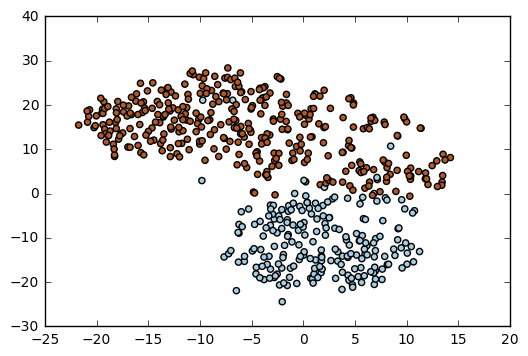

In [112]:
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=np.argmax(pred, 1), cmap=plt.cm.Paired)